In [1]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

%matplotlib inline

In [121]:
df = pd.read_csv('kaggle_survey_2022_responses.csv')

/var/folders/zg/4qrl00m92tng0x4lft8qdr9c0000gn/T/ipykernel_57833/613083911.py:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_survey_2022_responses.csv')


In [16]:
question_details = df.iloc[0].to_frame()
question_details.columns = ['full_text']

In [122]:
df = df.loc[1:]

In [21]:
question_details['multiple_choice'] = question_details.index.str.contains('_')

question_details['choice'] = question_details.loc[question_details['multiple_choice'], 'full_text'].str.split(' - ').apply(lambda x: x[-1].strip())

question_details['num'] = (question_details.index).to_series().str.replace('Q', '').str.split('_').apply(lambda x: x[0])
question_details.loc['Duration (in seconds)', 'num'] = 1
question_details['num'] = question_details['num'].astype('int')

In [38]:
question_details['text'] = question_details['full_text'].str.split('\s\(Select all that apply\)| - ').apply(lambda x: x[0].strip()).values
question_text = question_details[['num', 'text']].drop_duplicates()
question_text.index = question_text['num']
question_text.drop('num', axis=1, inplace=True)

In [41]:
question_text.loc[9, 'text']

'Have you ever published any academic research (papers, preprints, conference proceedings, etc)?'

In [117]:
def agg_multiple_choice(df, i_details):
    q = df.loc[:, i_details.index].isna().mean() * 100
    q.index = i_details['choice'].values
    return q

In [137]:
def agg_single_choice(df, i_details):
    q = df.loc[:, i_details.index[0]]
    counts = q.value_counts()
    total = counts.sum()
    return (counts / total * 100)

In [120]:
df

Twitter (data science influencers)                                            83.352086
Email newsletters (Data Elixir, O'Reilly Data & AI, etc)                      84.218861
Reddit (r/machinelearning, etc)                                               88.840272
Kaggle (notebooks, forums, etc)                                               53.406676
Course Forums (forums.fast.ai, Coursera forums, etc)                          83.306247
YouTube (Kaggle YouTube, Cloud AI Adventures, etc)                            50.172938
Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)                    91.165562
Blogs (Towards Data Science, Analytics Vidhya, etc)                           67.637621
Journal Publications (peer-reviewed journals, conference proceedings, etc)    84.148019
Slack Communities (ods.ai, kagglenoobs, etc)                                  92.807434
None                                                                          94.716006
Other                           

In [136]:
i_details.index[0]

'Q2'

In [138]:
agg_qs = {}
for i in range(1, question_details['num'].max() + 1):
    i_details = question_details.loc[question_details['num'] == i]
    if i_details.shape[0] > 1:
        print('multiple choice')
        agg_qs[i] = agg_multiple_choice(df, i_details)
    else:
        print('not multiple choice')
        agg_qs[i] = agg_single_choice(df, i_details)
    agg_qs[i].name = question_text.loc[i, 'text']

not multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
multiple choice
multiple choice
not multiple choice
not multiple choice
multiple choice
not multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
not multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
multiple choice
not multiple choice
not multiple choice
multiple choice
not multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
not multiple choice
multiple choice


In [140]:
def plot_question(i, agg_qs):
    return agg_qs[i].plot(kind='barh', title=agg_qs[i].name)

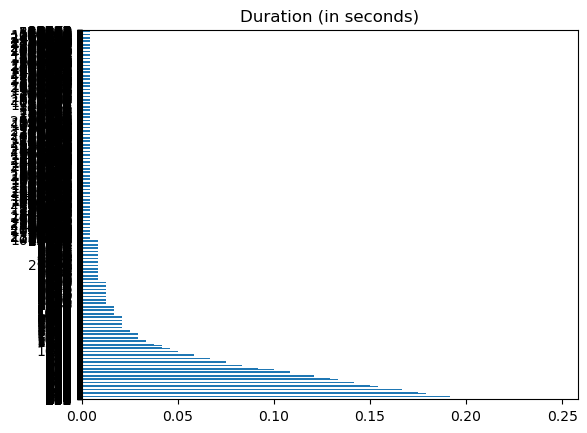

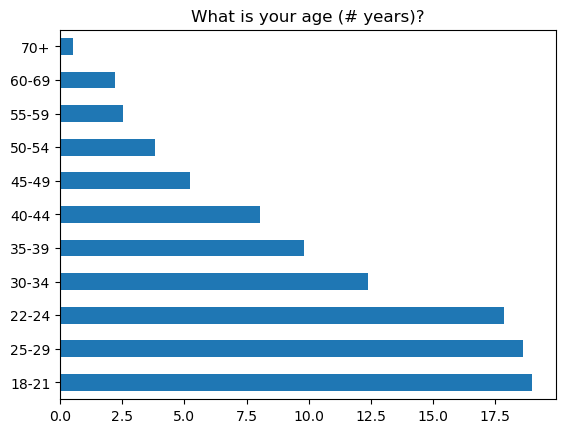

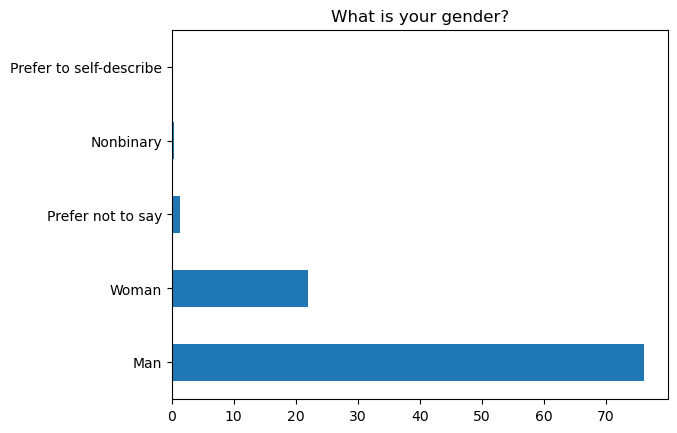

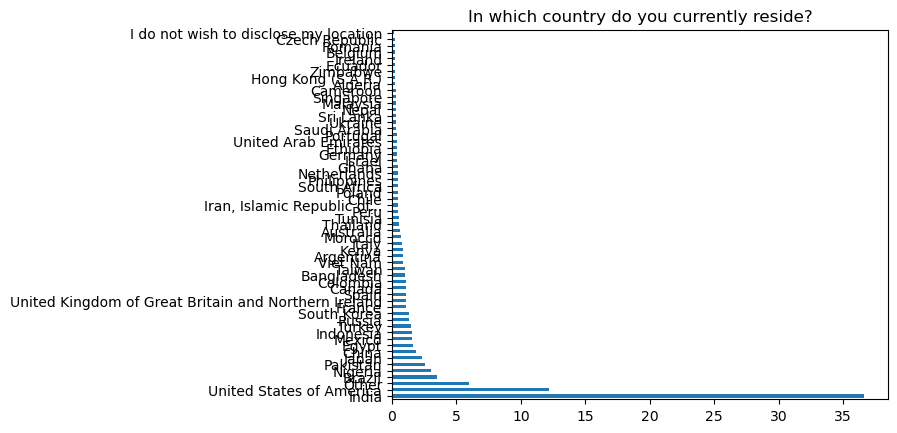

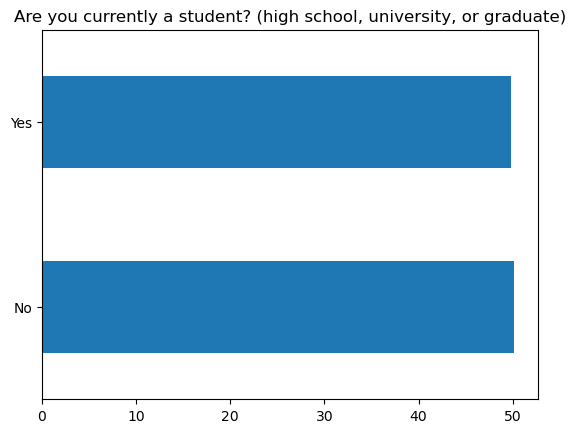

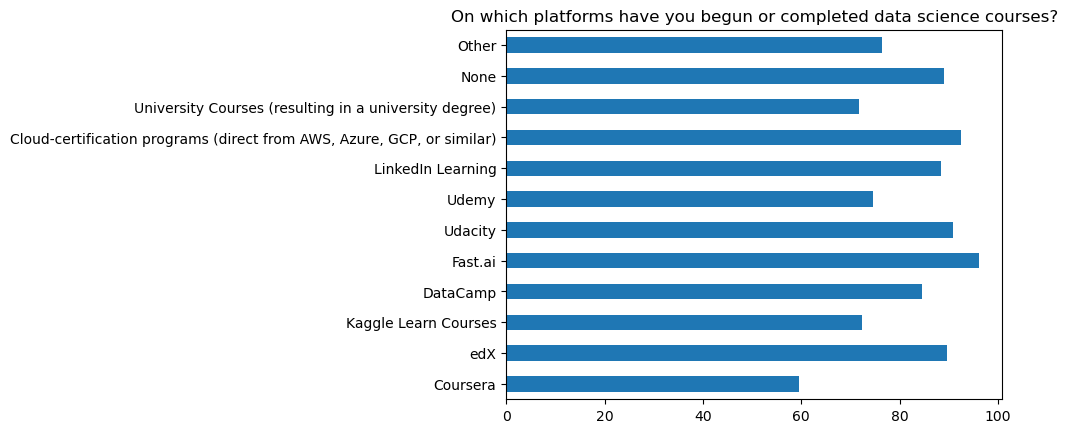

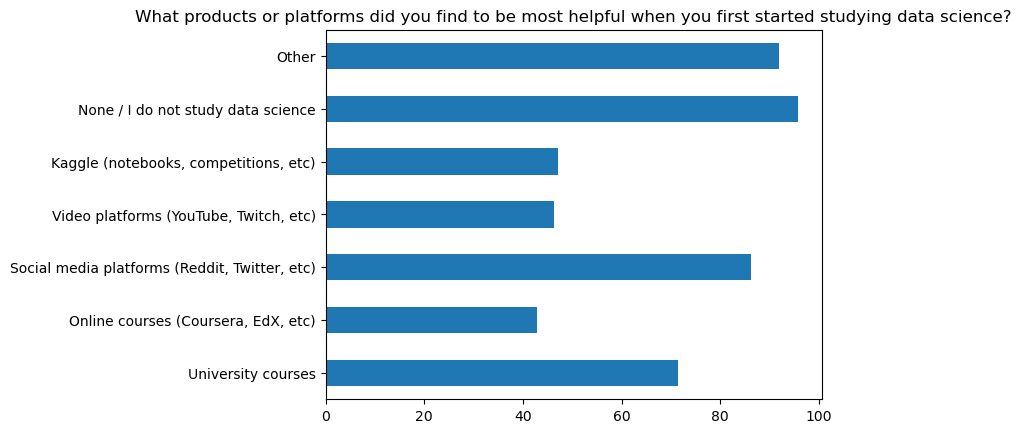

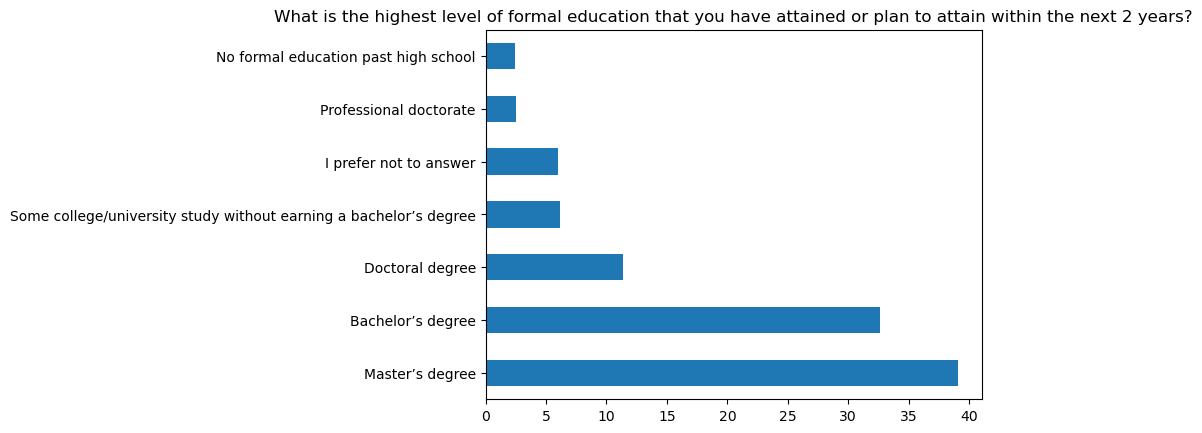

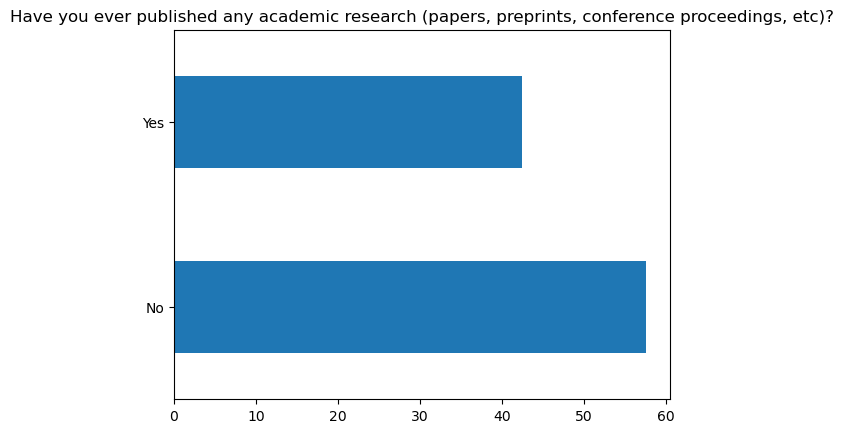

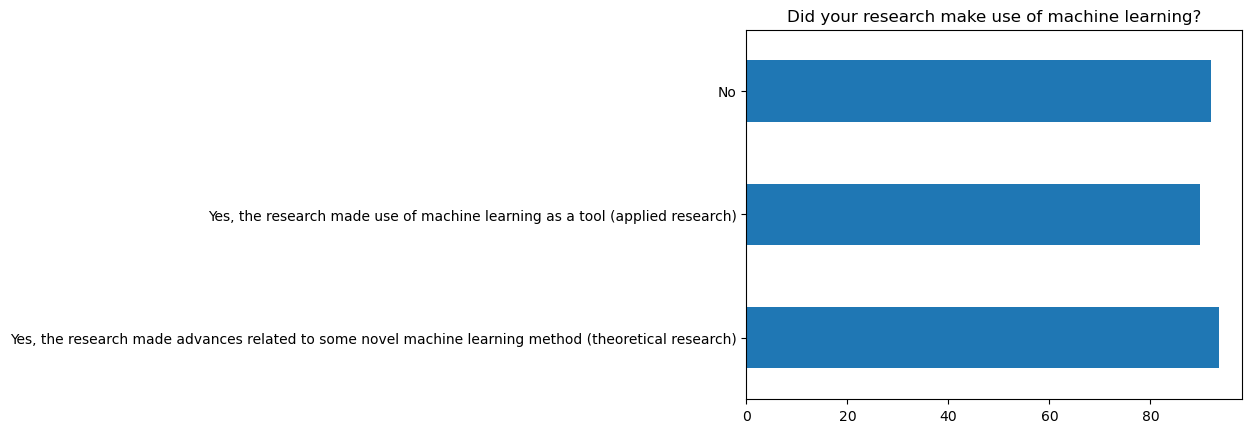

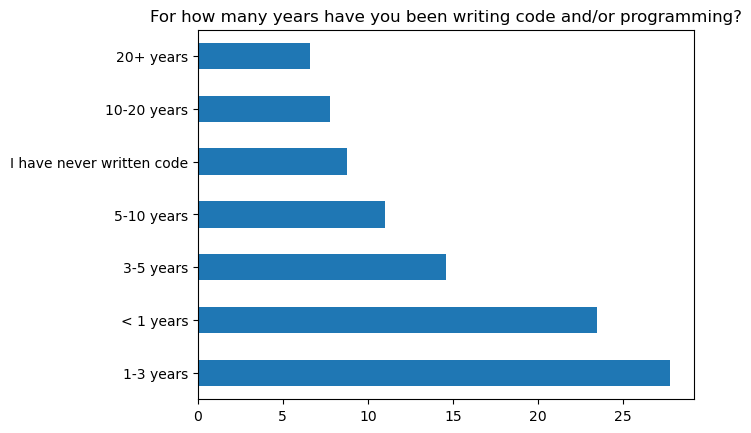

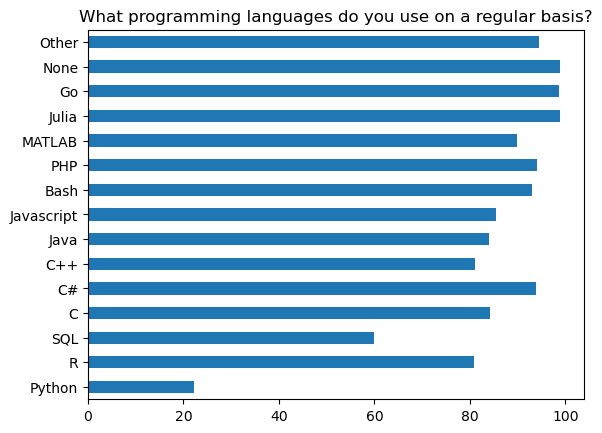

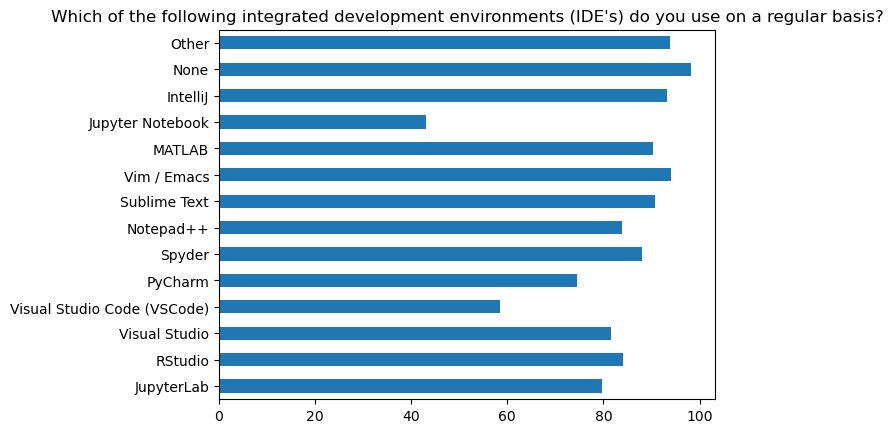

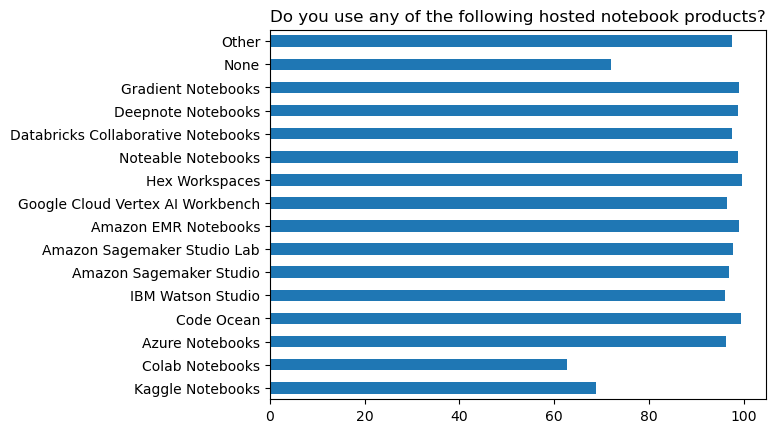

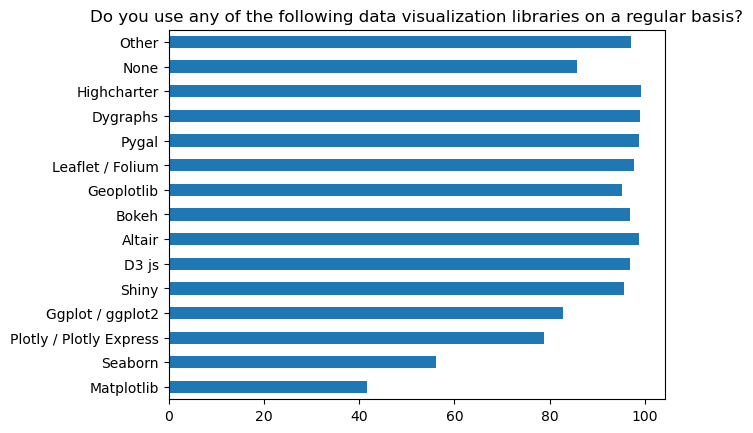

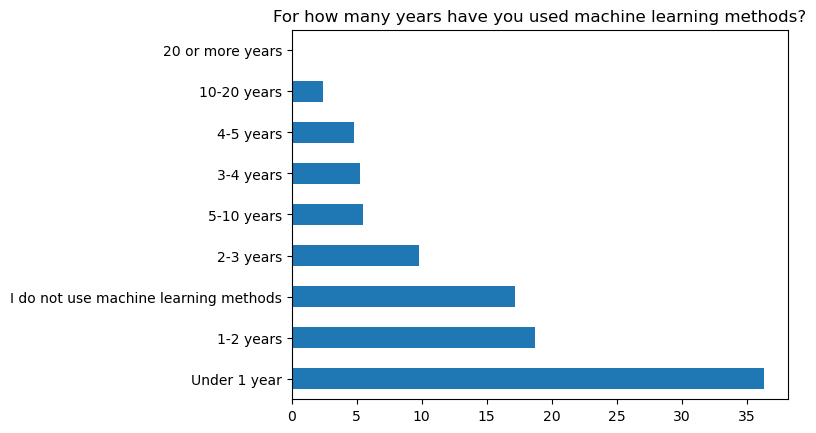

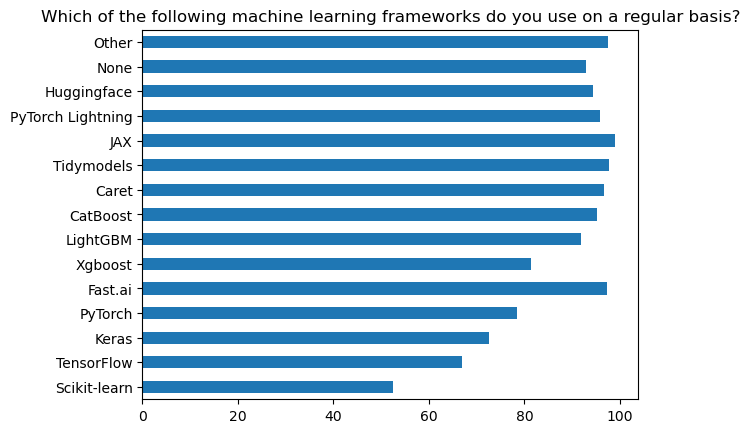

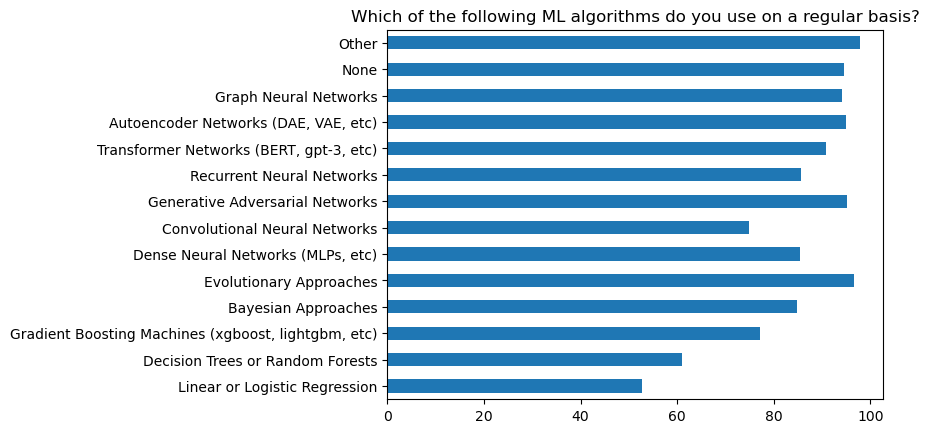

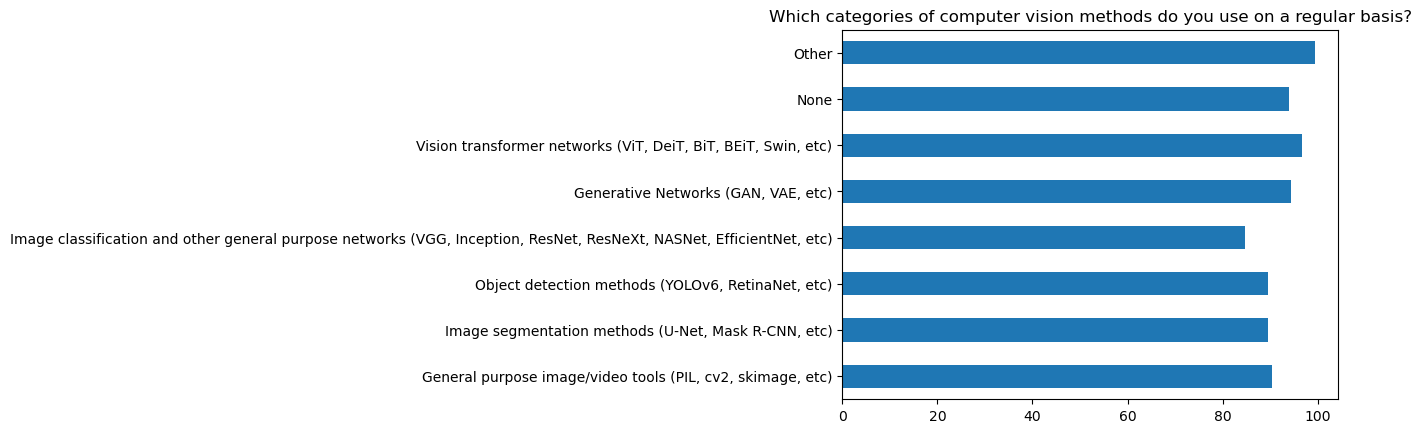

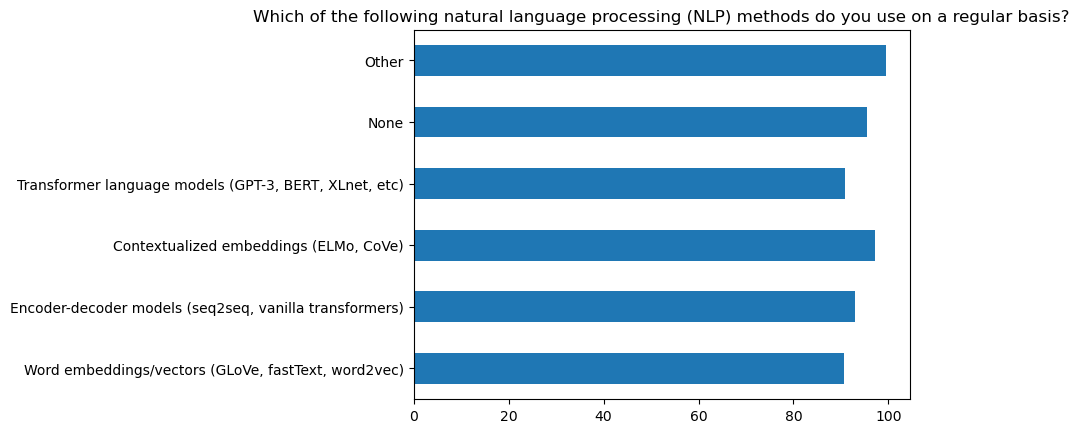

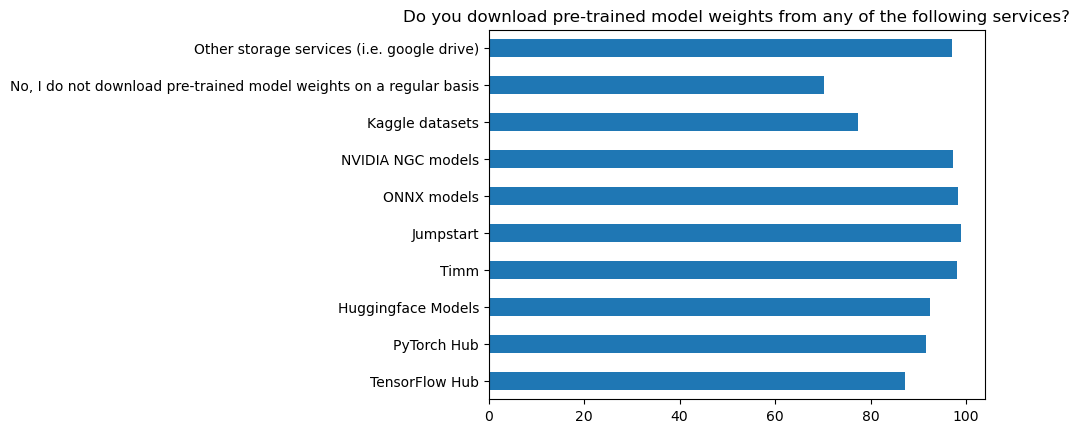

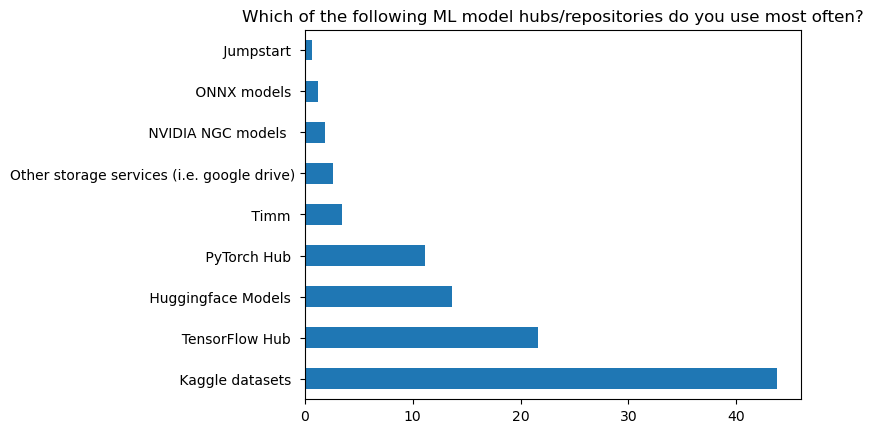

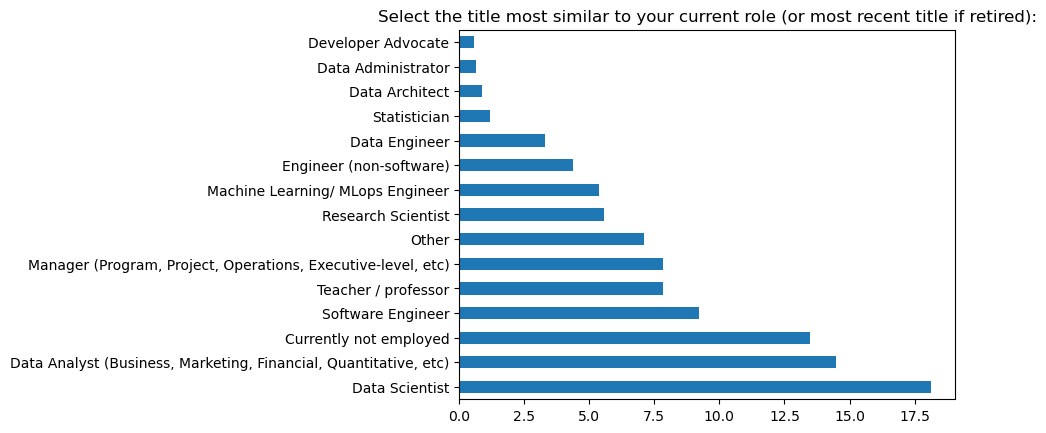

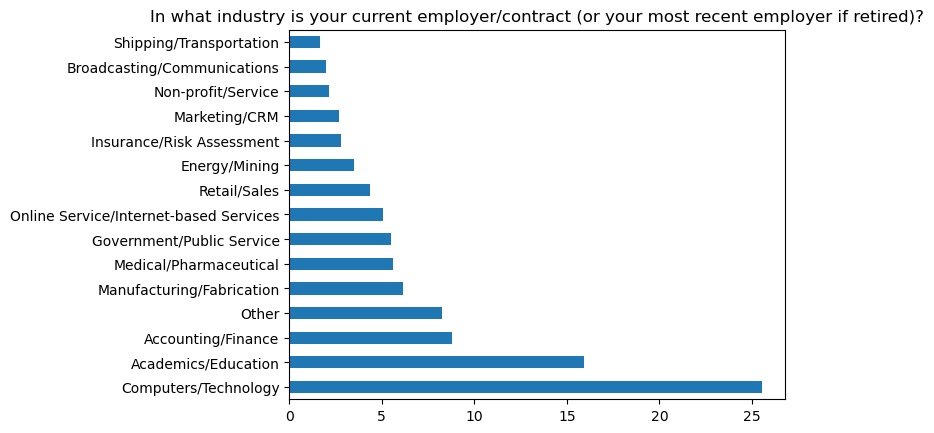

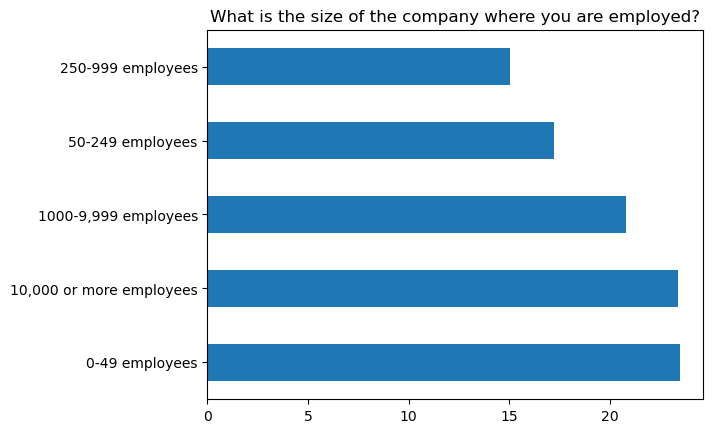

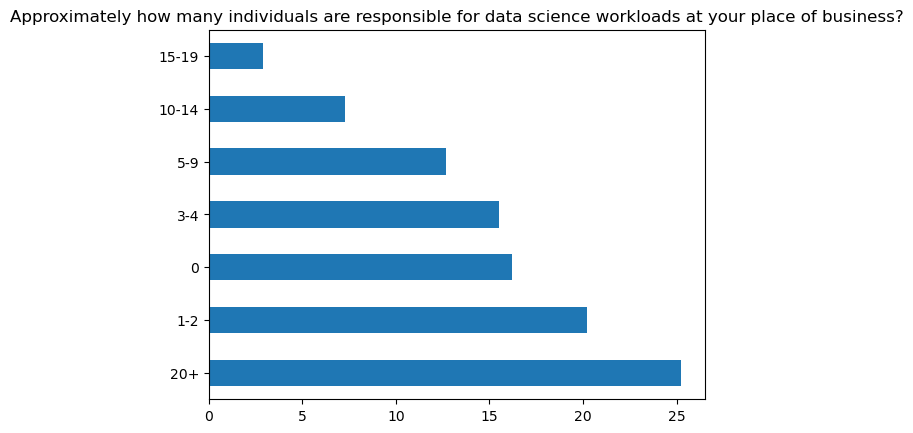

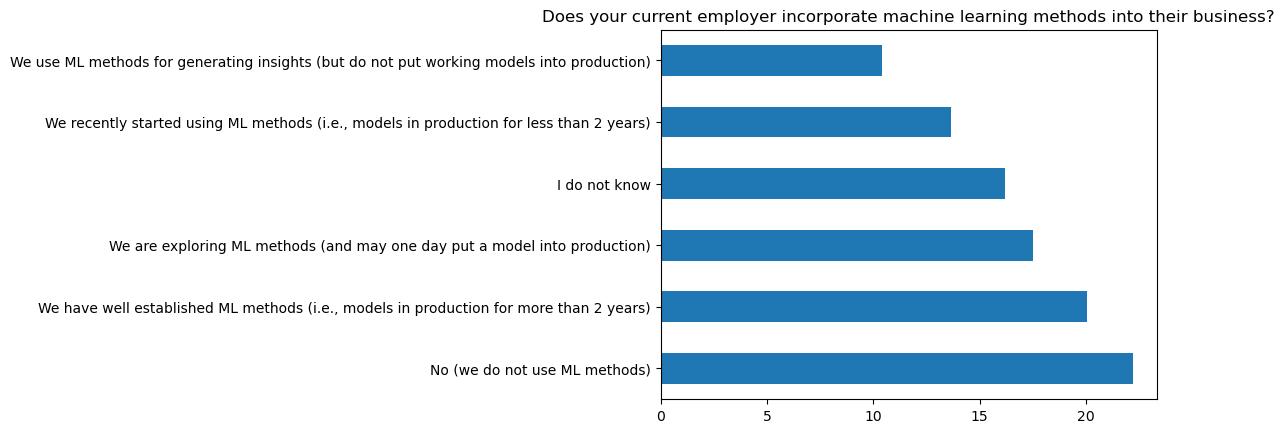

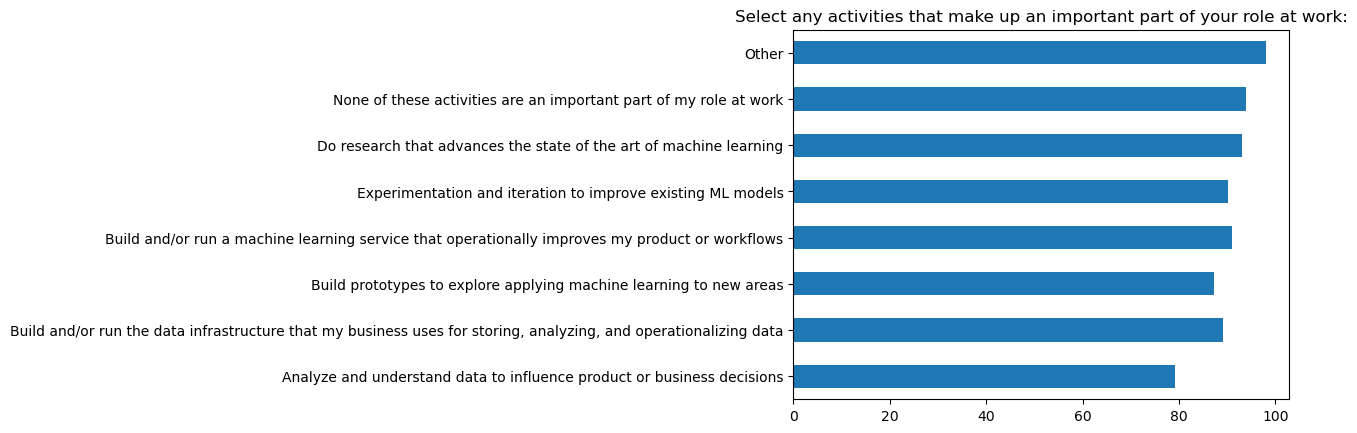

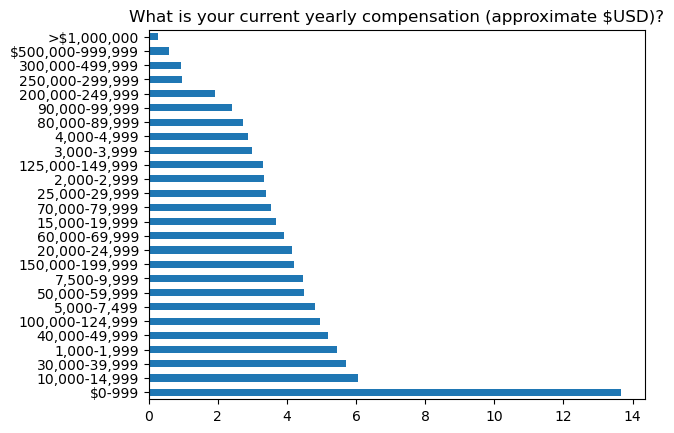

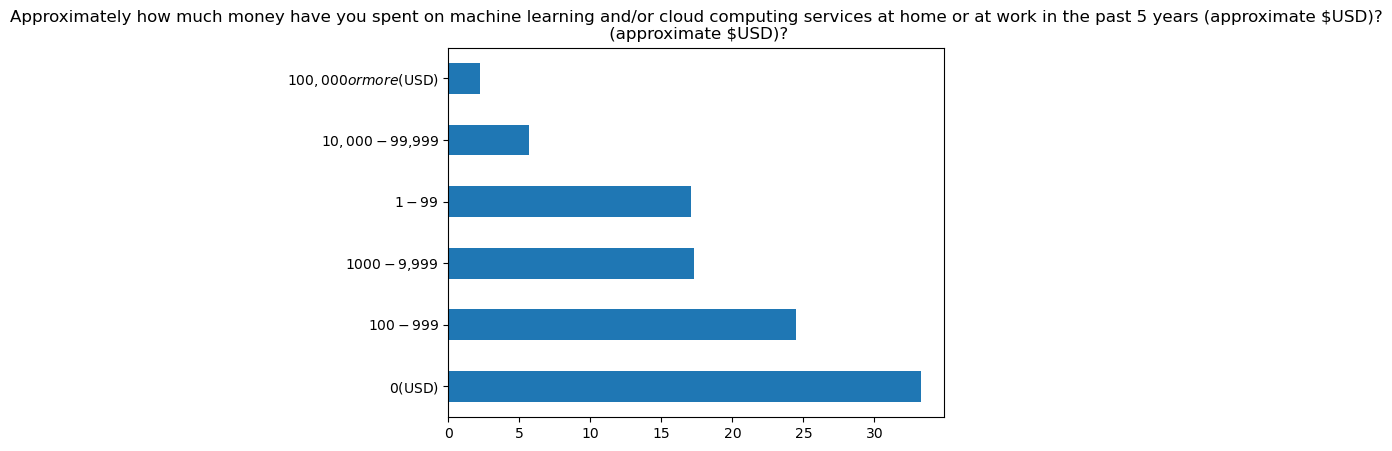

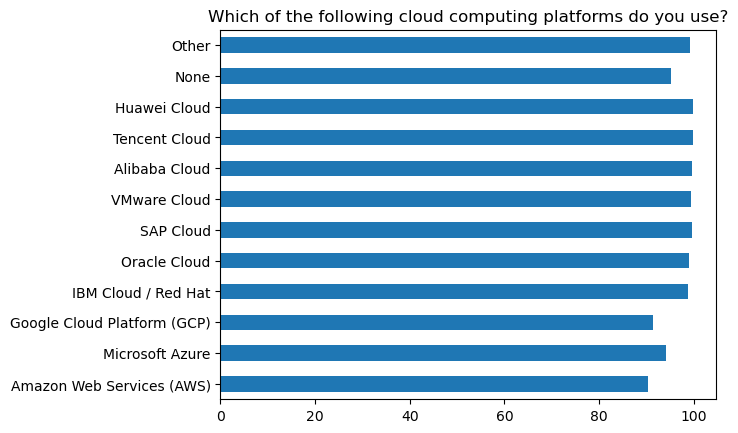

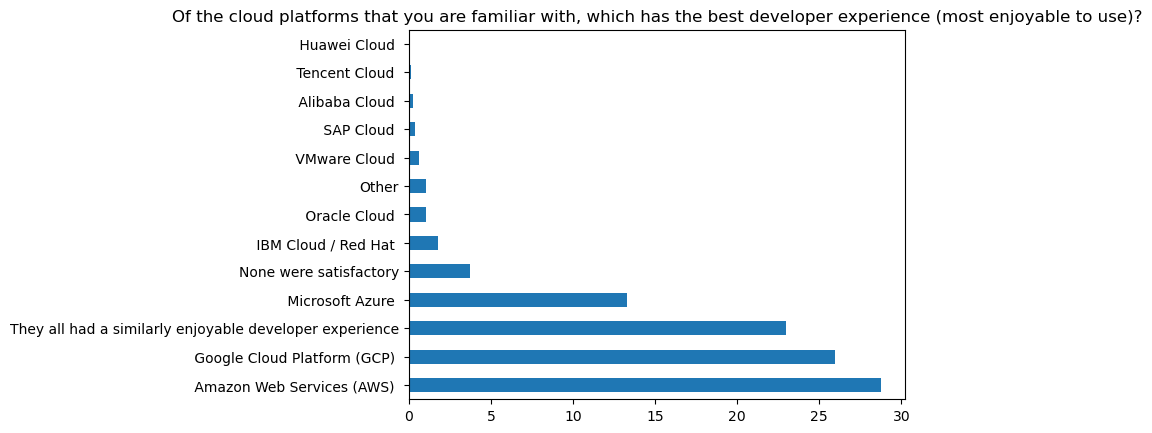

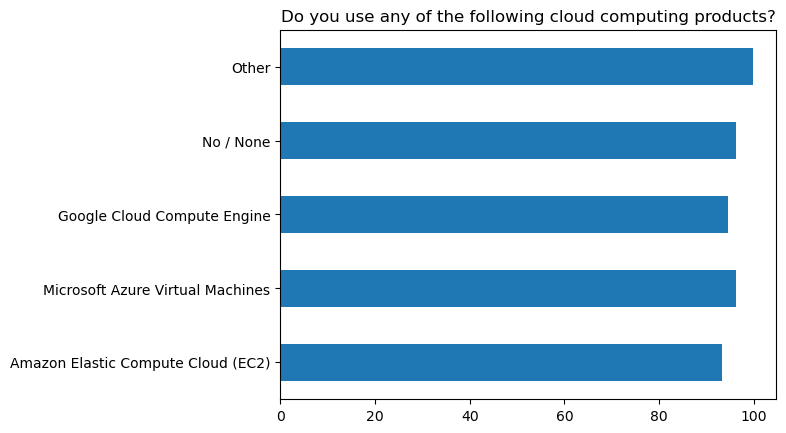

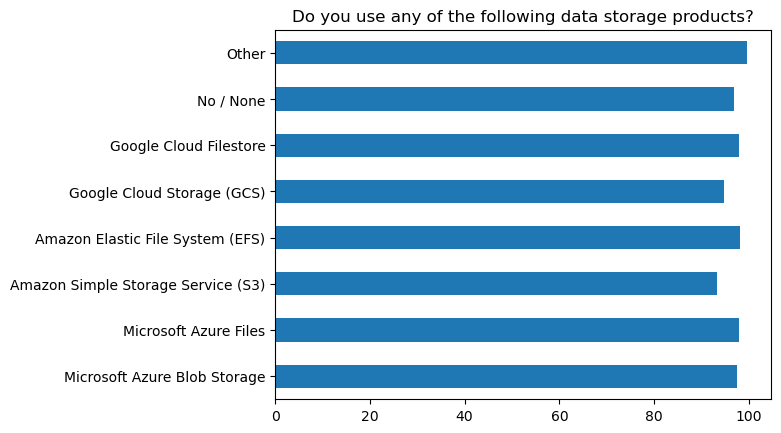

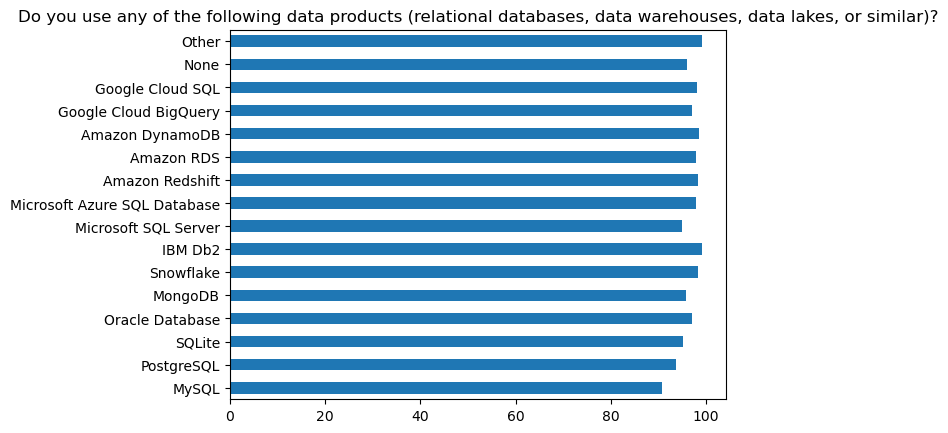

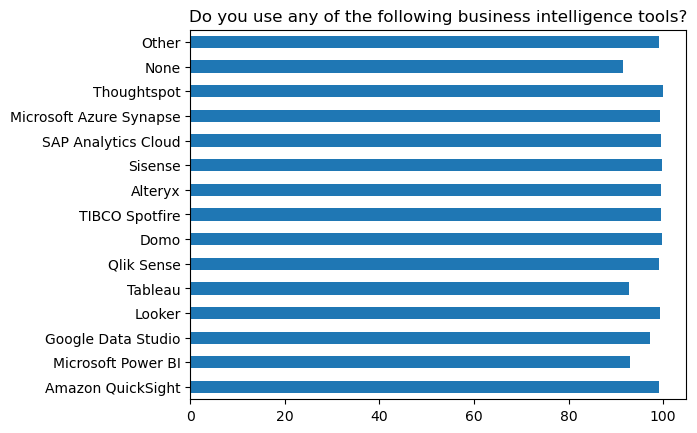

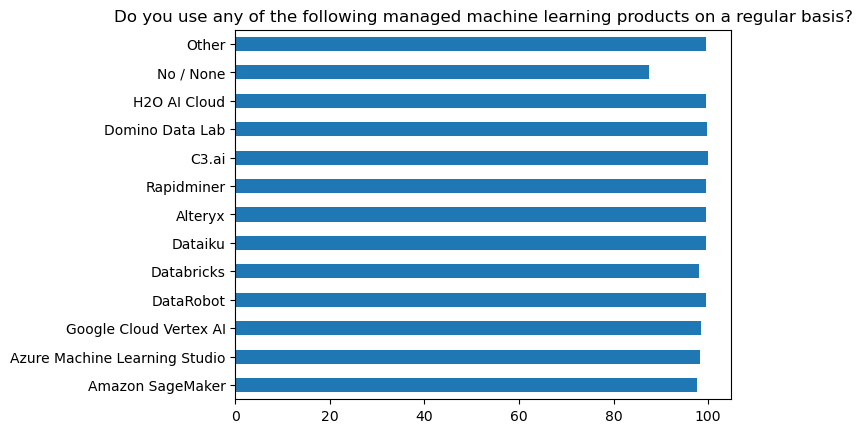

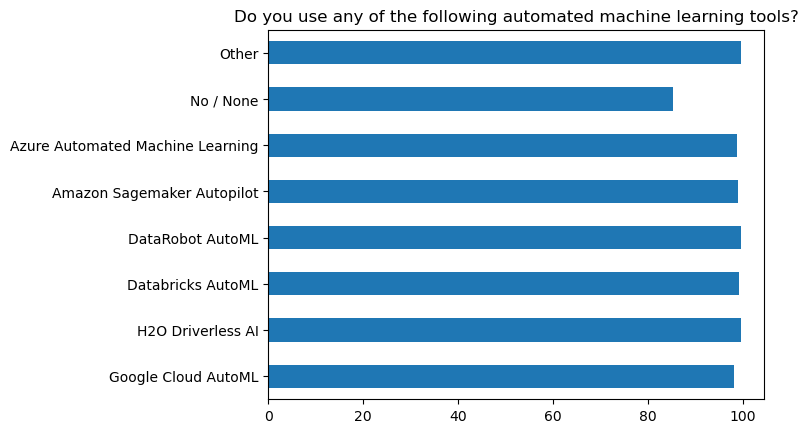

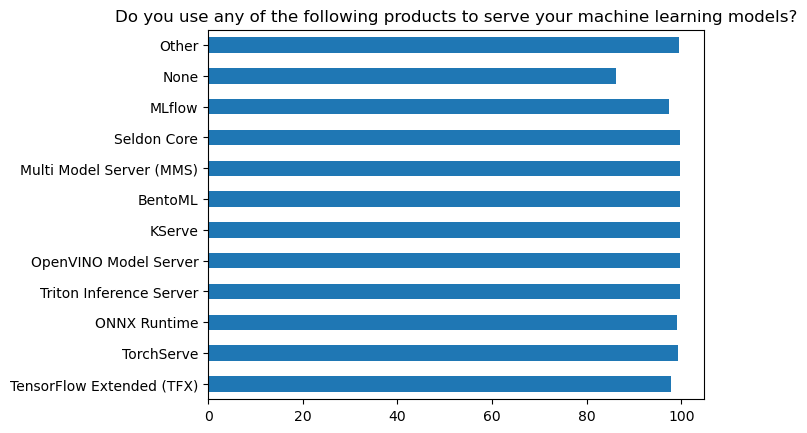

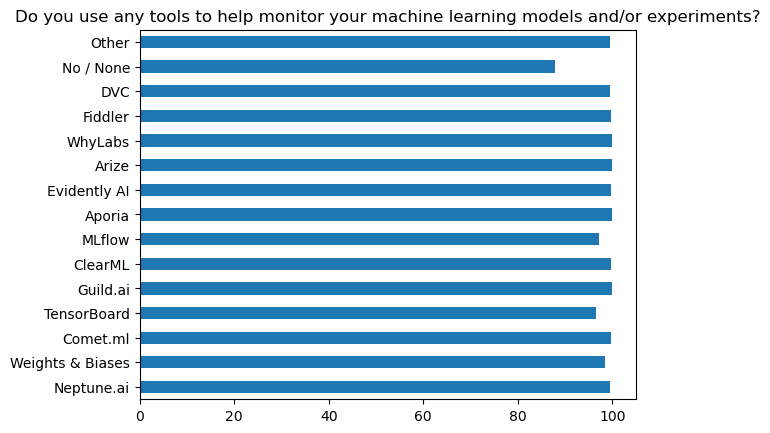

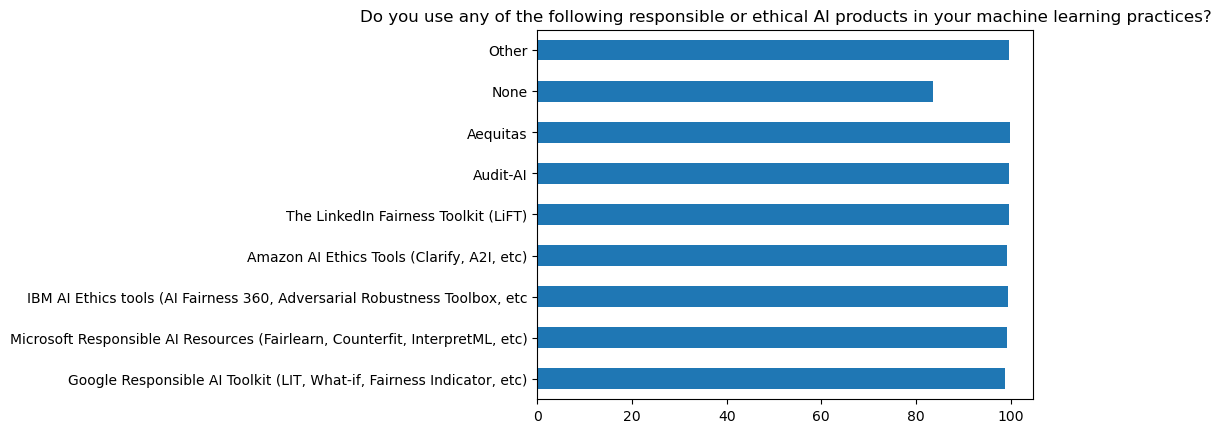

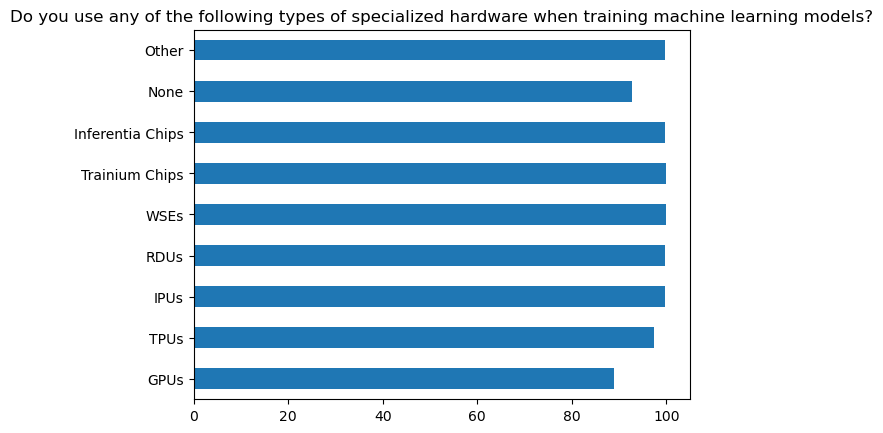

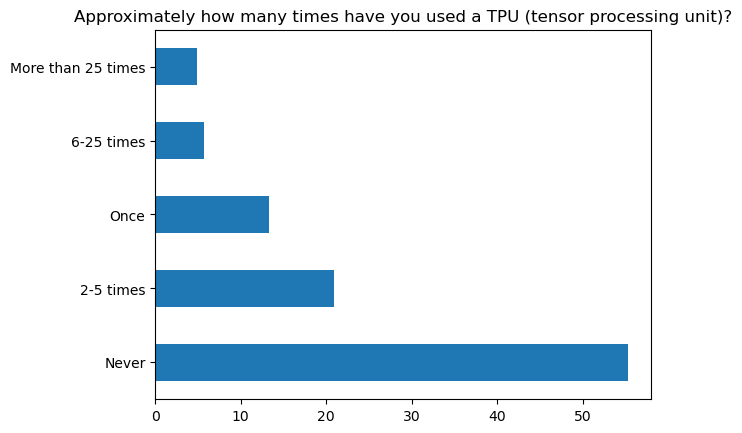

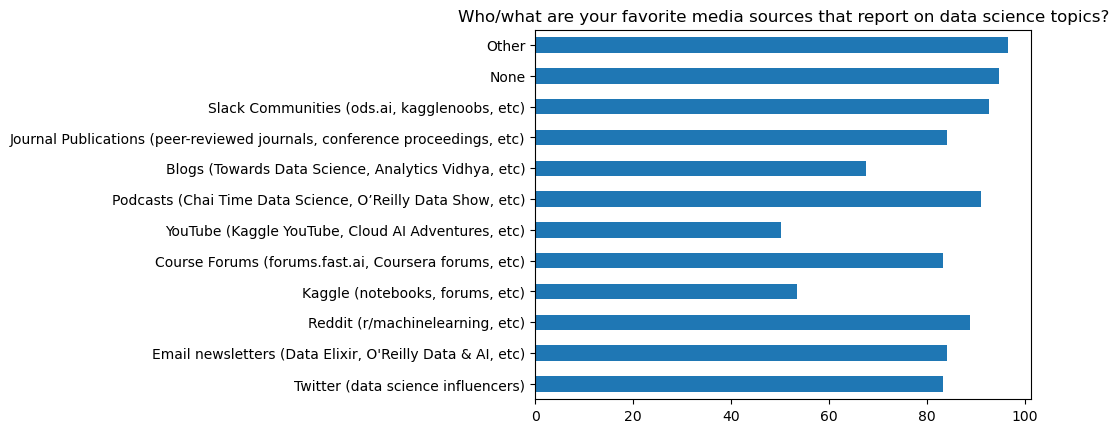

In [141]:
for i, df in agg_qs.items():
    plot_question(i, agg_qs)
    plt.show()

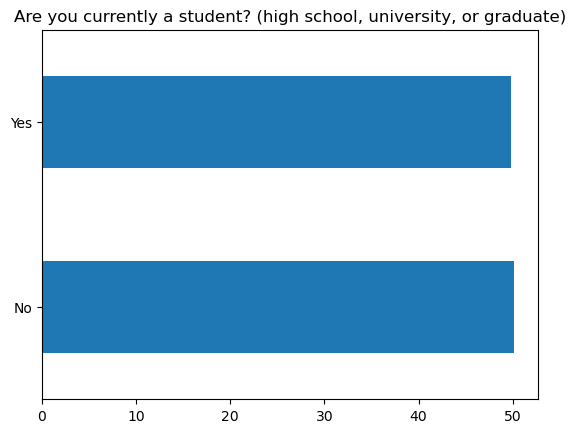

In [139]:
plot = plot_question(5, agg_qs)